## Capstone Project 2 Milestone Report
## Searching for Exoplanets
---

### Kepler Exoplanet Search:
### The Problem is Are We Alone?
The search for habitable planets outside our solar system has fascinated us for some time. Once theorized and now confirmed that there are many exoplanets (3,700 and counting), the search for life outside our solar system is now in full swing.

### Exoplanets can be identified as Points of Interest for the Scientific Research Community

The Transit method identifies possible planets crossing the path of stars from the Kepler camera’s point of view. This object of interest can then be directed to other telescopes for further analysis to determine and verify an exoplanet. Other details such as chemical composition of the star and by inference the chemical composition and possible atmosphere of the exoplanet can also be determined.

### Data from Kepler Mission 2 ‘Hunt for Exoplanet Kaggle competition

The data set contains over 5500 stars with 42 confirmed exoplanets. It is a time series with 3198 measurements of light intensity at 30 minute intervals. The data had been cleaned for the competition to remove known artifacts from the Kepler camera.

The light comes from stars at different distances, of different brightness and temperatures and of different sizes with different rotations. Small changes in intensity of the light from the star can be due to solar flares, sun spots or the rotation of the star itself.

An exoplanet(s) transiting the star from our point of view will cause the light to dim by an amout depending on the size of the object, the angle and the depending duration of the transit. The spaceship is effectively detecting a flea crossing the beam of a headlight several miles away. The light from the star also intensifies as the planet reflects the light of the star as it is going around the back.

### Wrangling and Cleaning the Data

With the large range of fluxuations in light intsentity I normalized the data to allow a better comparision. Applying the Fast Fourier Transformation allows the signal allows it to be broken down to its visible frequences. Plotting both these allows us to see the patterns present in the flux measurements (see below).

A single dimming over the 80 day period may be a slower orbiting planet or other star activity. Two low intesity readings provide no additional information as they may not be related to each other, but three dimings equally spaced apart are a strong contender for an exoplanet.

Once plotted out after normalization it is clear that stars with exoplanets have a slightly different distribution (usually 2 peaks) than those without which have a high peak.

With the Fourier Transformation the first peak is the overall indicator of the frequency of the series. Subsequent harmonics (peaks) indicate the presence of an exoplanet.

It should be noted that the planets being detected here, if they crossed the path of a star at least 3 times over the 80 days, have an astonishingly fast orbit of 26 days or less!

### Other Potential Datasets

Another dataset available is cumulative data from the subsequent 16 Kepler 2 missions. This data that was taken after the initial malfunction of the navigation gears of the ship, but still able to take images of other parts of the sky. This dataset includes the star names, planet names and more details of the stars including their position in the sky.

### Initial Findings
The graphed data does give a nice image. One main problem is the rarity of the planetary observations in the dataset. For the provided competition training data 37 out of 5050 are exoplanets. In the test dataset only 5 out of 500 are exoplanets. This imbalance called for upsampling.

In terms of hyperparameter tuning I used GridSearchCV to power through and work with the hyper parameters of 3 classifiers. The imblanced set and the accuracy dilemma are the biggest challenges. Many of the models optimize for overall accuracy - which means correctly labelling non-exoplanets as well, but high recall is the actual target so some additional weight needs to be applied as part of the balancing. 

---

###  Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import training Dataset of 5050 stars of which 37 have confirmed labelled exoplanets

In [3]:
df = pd.read_csv('exoTrain.csv')

In [3]:
df.shape

(5087, 3198)

### The Dataset contains 3197 columns of light intensity taken every 30 mins over 80 days

In [4]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### EDA 

In [4]:
# Explore Star Light Intensity with & without exoPlanet
# remove the label data

# create dataset where LABEL = 2 
df_exo = df[df['LABEL']==2]
# create dataset where LABEL = 1
df_no_exo = df[df['LABEL']==1] 

In [5]:
# strip out the label column
df_exo = df_exo.iloc[:,1:]
df_no_exo = df_no_exo.iloc[:,1:]

In [61]:
#inspect the data- time stamps across the top
df_exo.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [98]:
#inspect the data- time stamps across the top
df_exo.shape

(37, 3197)

In [62]:
#inspect the data- time stamps across the top
df_no_exo.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,29.75,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,7.87,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,68.29,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97
40,-167.02,-137.65,-150.05,-136.85,-98.73,-103.14,-107.70,-123.19,-125.65,-119.86,...,-97.43,-79.79,-80.62,-78.22,-105.06,-69.67,-90.45,-73.67,-66.71,-66.07
41,207.74,223.60,246.15,224.06,210.77,189.56,172.68,170.31,148.79,181.26,...,-53.06,-136.92,-174.97,-180.46,-164.01,-126.58,84.05,63.81,108.36,78.10


## Plot the light intensity before normalization

Notice the semi defined wave form in the exoplanet confirmed data but not quite distinct from the non-exoplanet data.

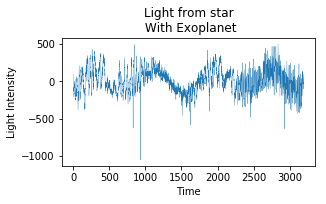

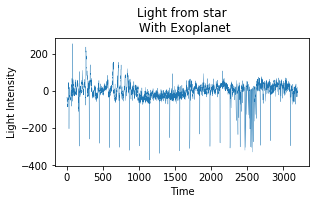

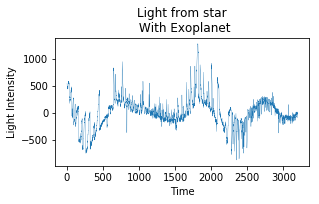

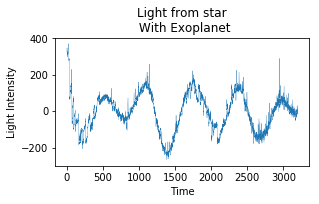

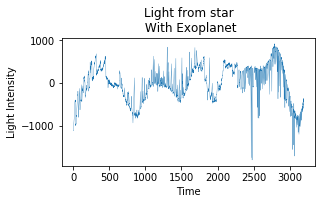

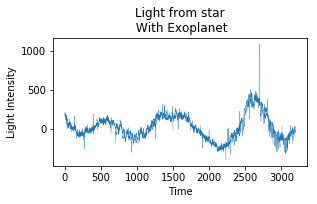

In [17]:
#plot out the first 6 planets
for i in range(0,6):
    Y = df_exo.iloc[i]
    X = np.arange(len(Y)) 
    f, axs = plt.subplots(figsize=(10,8))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity')
    plt.xlabel('Time')
    plt.title('Light from star\n With Exoplanet')
    plt.plot(X, Y, linewidth=.3)

plt.show()    


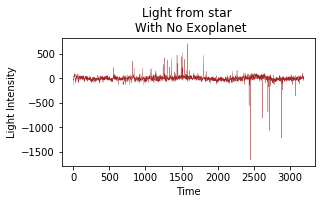

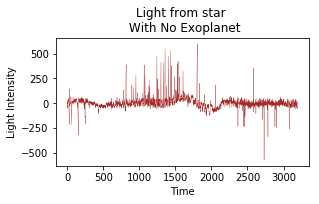

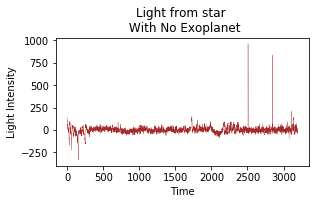

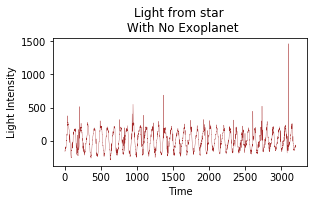

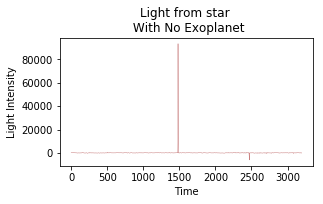

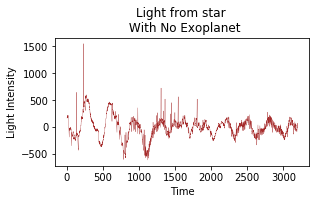

In [18]:
#plot out the first 6 planets
for i in range(0,6):
    Y = df_no_exo.iloc[i]
    X = np.arange(len(Y)) 
    f, axs = plt.subplots(figsize=(10,8))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity')
    plt.xlabel('Time')
    plt.title('Light from star \n With No Exoplanet')
    plt.plot(X, Y, linewidth=.3, color='brown')

plt.show()    


## Normalize using standard scaler to account for star size, distance and brightness

In [19]:
# import and instatiate scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [29]:
def normal(X):
    Y= (X-np.mean(X))/(np.max(X)-np.min(X))
    return Y

In [30]:
df_no_exo_scale= df_no_exo.apply(normal,axis=1)
df_exo_scale = df_exo.apply(normal,axis=1)

## fit and transform normalizer

In [22]:
df_no_exo_scale = scale.fit_transform(df_no_exo.as_matrix())
df_exo_scale = scale.fit_transform(df_exo.as_matrix())

## convert matrices back into dataframe

In [33]:
df_no_exo_scale = pd.DataFrame(df_no_exo_scale)
df_exo_scale = pd.DataFrame(df_exo_scale)

In [37]:
df_no_exo_scale.shape

(5050, 3197)

In [34]:
df_no_exo_scale.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,-0.059351,-0.034411,-0.022027,-0.013706,-0.000738,-0.015032,-0.009857,0.008074,0.022200,0.012397,...,-0.021402,-0.009463,-0.015292,0.011427,0.005586,0.016136,-0.007444,0.013127,0.013081,0.020907
38,-0.034012,-0.027975,-0.026899,-0.028308,-0.016516,-0.047195,-0.001317,-0.008045,0.004660,0.003123,...,-0.041150,-0.036232,-0.043071,-0.050047,-0.023671,-0.026617,-0.006970,-0.003887,0.005386,-0.010163
39,0.108953,0.104819,0.071419,0.080650,0.074937,0.075584,0.065837,0.046111,0.034100,0.051893,...,-0.001449,-0.003019,-0.023992,-0.019334,-0.027711,-0.031207,0.017623,0.017330,-0.001071,0.000060
40,-0.097838,-0.081119,-0.088178,-0.080663,-0.058964,-0.061474,-0.064070,-0.072887,-0.074288,-0.070992,...,-0.058224,-0.048182,-0.048654,-0.047288,-0.062567,-0.042421,-0.054250,-0.044698,-0.040736,-0.040372
41,0.001756,0.001915,0.002142,0.001920,0.001786,0.001573,0.001403,0.001379,0.001163,0.001490,...,-0.000867,-0.001711,-0.002093,-0.002148,-0.001983,-0.001607,0.000512,0.000308,0.000756,0.000452


In [42]:
df_no_exo_scale['FLUX.5'].max()

0.78120525318874356

In [38]:
df_exo_scale.shape

(37, 3197)

## Plot light intensity with normalized values
The wave form in the exoplanet confirmed data is now more defined and quite distinct from the non-exoplanet data.

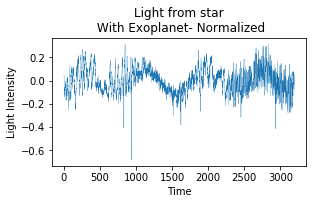

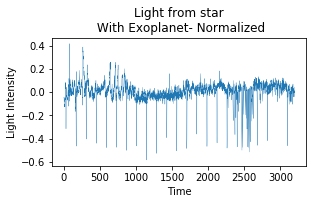

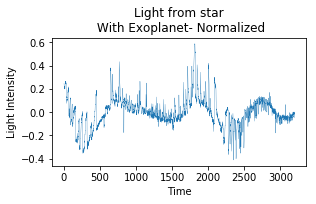

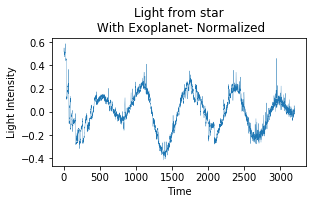

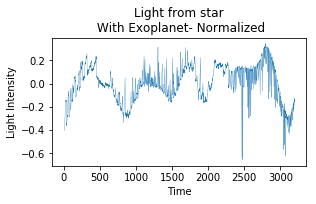

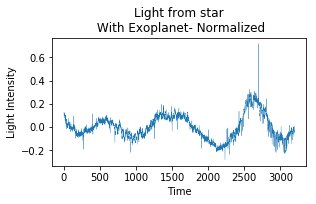

In [37]:
#plot out the first 6 planets
for i in range(0,6):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    f, axs = plt.subplots(figsize=(10,8))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity')
    plt.xlabel('Time')
    plt.title('Light from star\n With Exoplanet- Normalized')
    plt.plot(X, Y, linewidth=.3)

plt.show()    

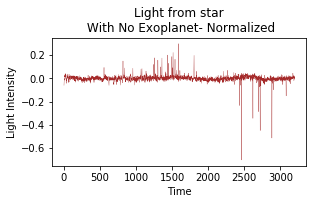

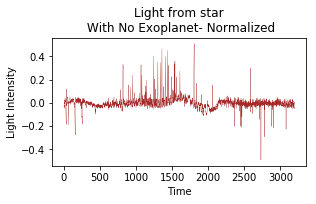

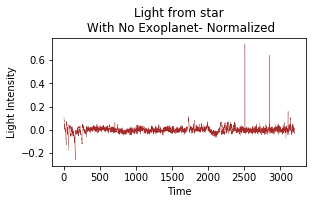

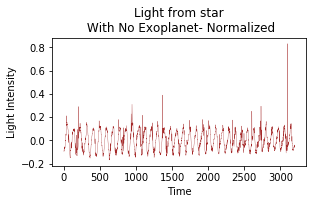

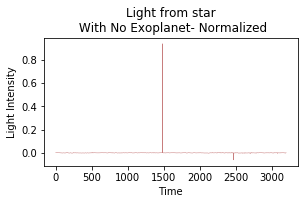

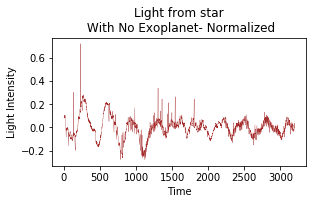

In [36]:
#plot out the first 6 planets
for i in range(0,6):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    f, axs = plt.subplots(figsize=(10,8))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity')
    plt.xlabel('Time')
    plt.title('Light from star\n With No Exoplanet- Normalized')
    plt.plot(X, Y, linewidth=.3,color='brown')

plt.show()    

Overlay the two time series to see where they condense. Red is Exoplanet Stars and Blue is Non-Exoplanet stars.

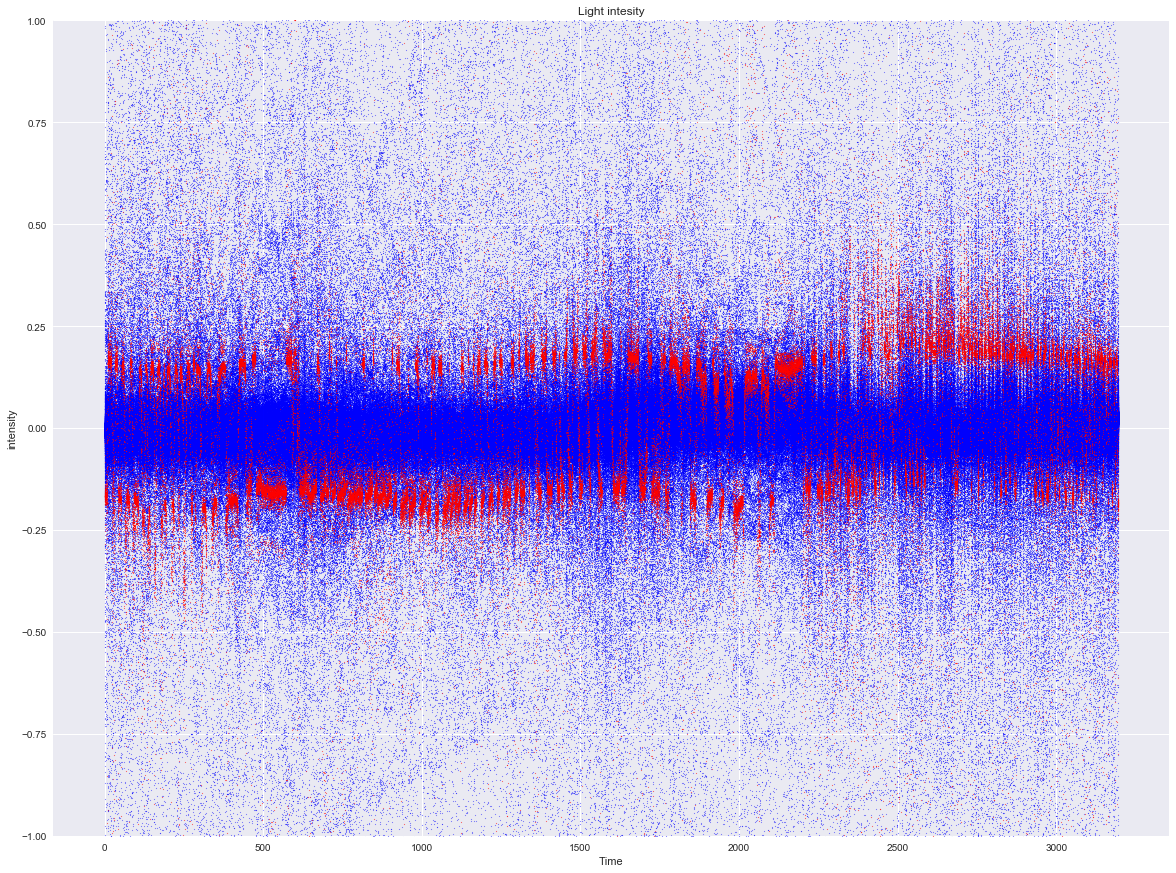

In [85]:
plt.figure(figsize=(20,15))
for i in range(0, 5000 ):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   
    
    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.8, alpha=.4, color ='blue')
    
for i in range(0, 37 ):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   

    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.8, alpha=.5, color= 'red')


plt.show()

## Look at the distributions of intensity for stars with transit- notice two peaks

Inspect the distributions for a clearer visual.

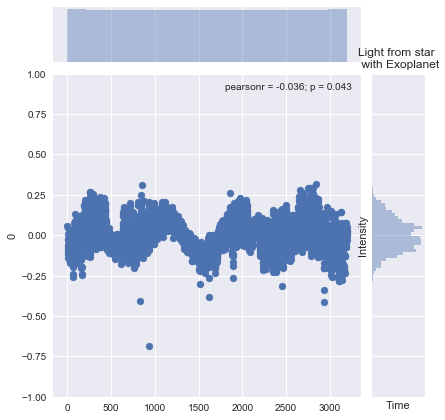

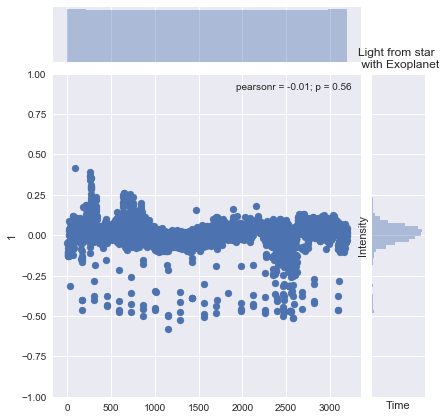

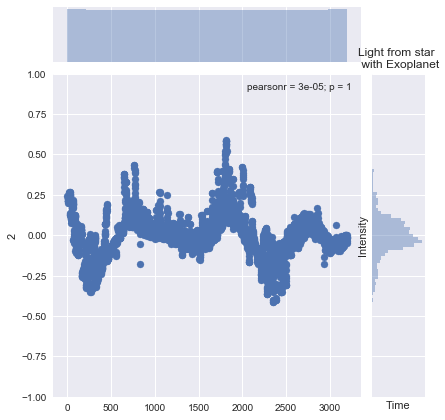

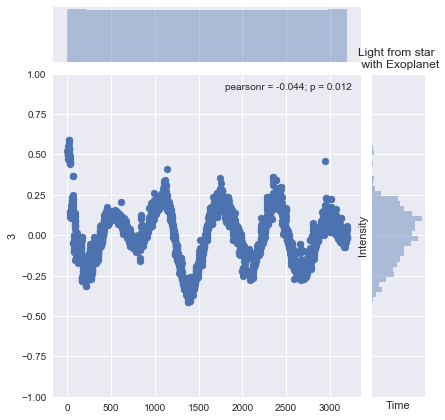

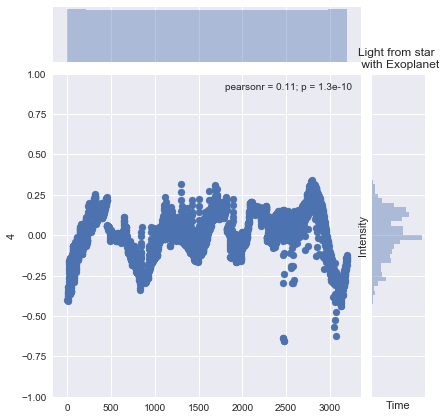

In [56]:
for i in range(0,5):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(2, 1, i+1)
    sns.jointplot(x=X, y=Y, size=6)
    plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star \n with Exoplanet')
    
#    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()


## how do the distributions look for stars without transit - single peak

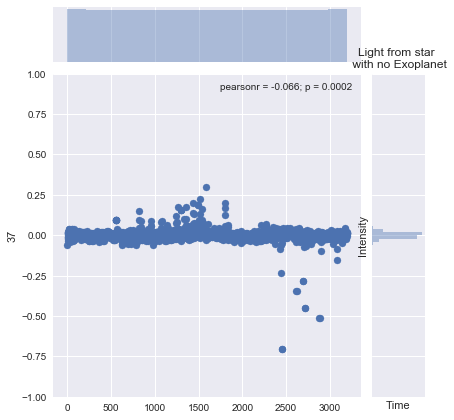

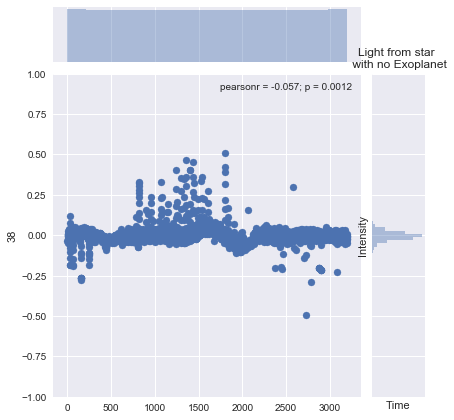

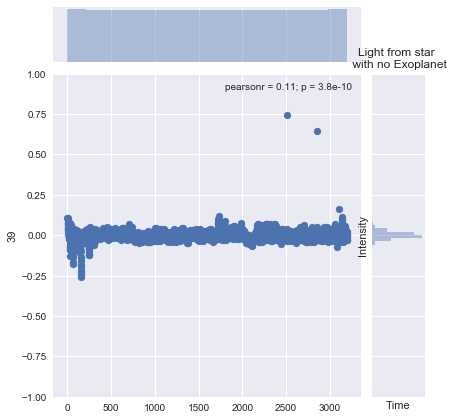

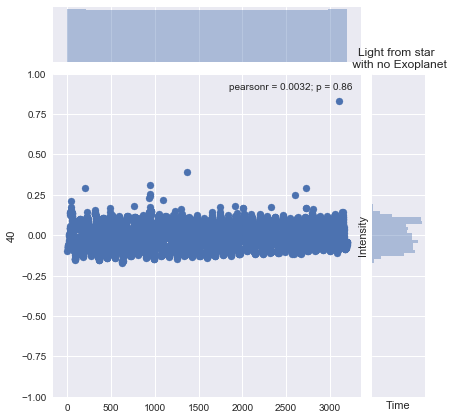

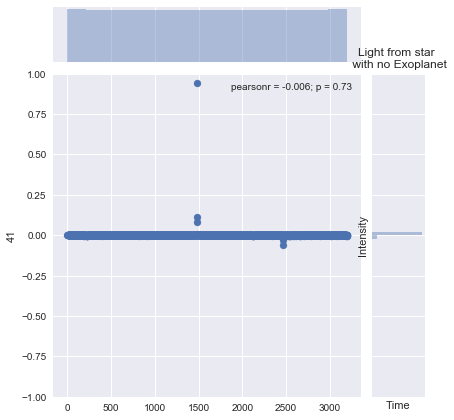

In [57]:
for i in range(0,5):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y)
    plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star \n with no Exoplanet')
    
#    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()


## Exploring the distributions

In [44]:
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)

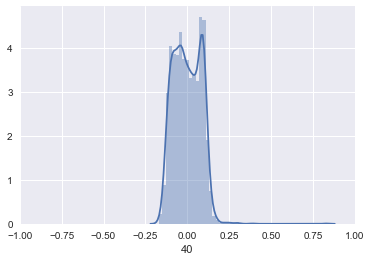

In [52]:
x = df_no_exo_scale.iloc[3]
plt.xlim(-1,1)
sns.distplot(x);

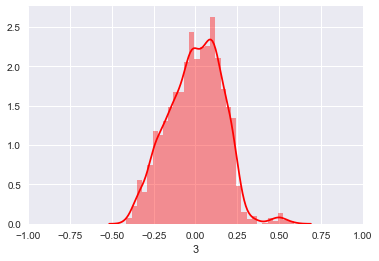

In [53]:
x = df_exo_scale.iloc[3]
plt.xlim(-1,1)
sns.distplot(x, color='red');

## Looking at the intensity with KDE : no exoplanet

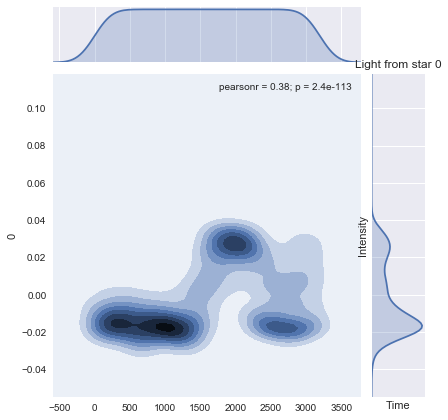

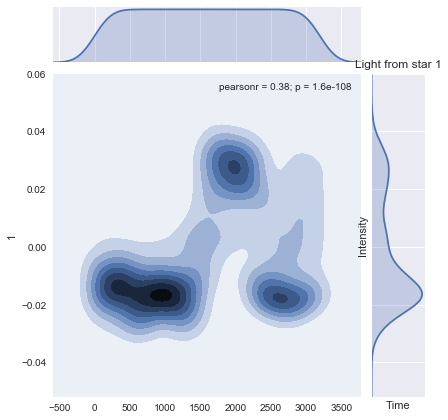

In [97]:
for i in range(0,2):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y,kind = 'kde')
    #plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    

## Looking at the intensity with KDE : YES exoplanet

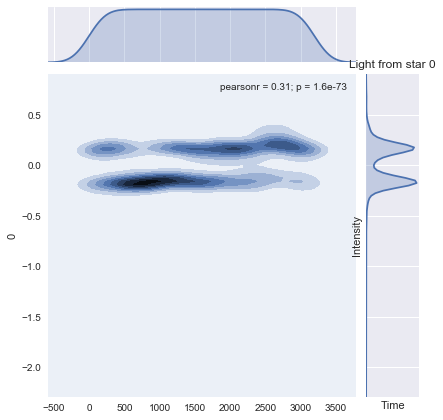

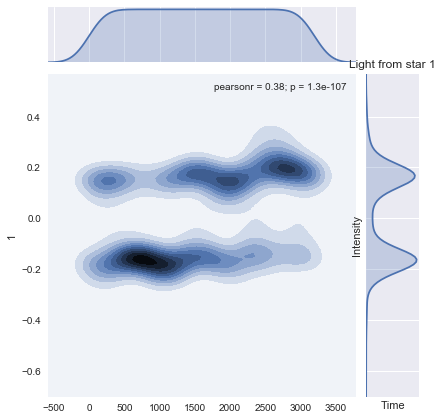

In [98]:
for i in range(0,2):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y,kind = 'kde')
    #plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))

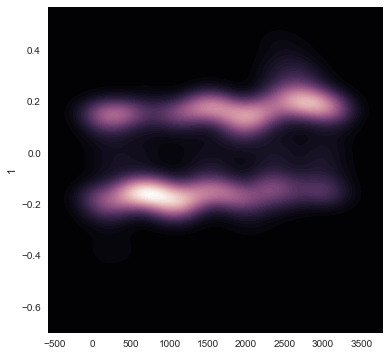

In [104]:
y = df_exo_scale.iloc[1]
x = np.arange(len(y)) 

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True);